In [149]:
# Set up the workspace
using SumOfSquares, JuMP, PolyJuMP, DynamicPolynomials, MultivariatePolynomials, RecursiveArrayTools, LinearAlgebra
using GLPK    # Chosen SDP solver
using Plots
gr()

include("../src/NormalSoS.jl")

Main.NormalSoS

In [150]:
# Function to construct a real, negative-definite, non-normal matrix A, of size n×n
function randsys(n)
    
    S = -rand(Float64,n); # Choose the eigenvalues
    
    S = diagm(S);
    Q = eye(n);
    for ii=1:n # Choose the random normalised eigenvectors
        v = randn(Float64,n);
        v = v./norm(v);
        Q[:,ii] = v;
    end
    A = Q*S*inv(Q);    # Constructs real matrix A with eigenvalues S, eigenvectors v
    println("Computed matrix A")
    
    return A
    
end

randsys (generic function with 1 method)

# Linear Examples

As a first test case we will examine the linear example of Zhou _et al._ (2012). For a linear system the dynamics is expressed in terms of a matrix $A$, and the properties of the decomposition are determined by some well known properties of this matrix.
\begin{equation}
    \dot{x} = f(x) = Ax.
\end{equation}
The decomposition of $f(x)$ is then the decomposition of $A$ as
\begin{equation}
    A = A_g + A_c,
\end{equation}
where,
\begin{equation}
    U(x) = -\frac{1}{2}x^\top A_g x.
\end{equation}
If $A$ is a normal matrix, then an orthogonal decomposition should be achieveable via a symmetric-antisymmetric decomposition. In this case the symmetric gradient matrix is given by,
\begin{equation}
    A_g = \frac{1}{2}(A+A^*).
\end{equation}
If $A$ is not normal, then the gradient matrix is given by the slightly more complicated expression:
\begin{equation}
    A_g = \frac{1}{2} \left( \int_0^\infty \exp(At) \exp(A^*t)\,\text{d}t\right)^{-1}.
\end{equation}
A useful comparison can therefore be made between this analytical expression for the quasipotential and that resulting from the SoS method for non-normal linear systems.

In [151]:
# A 2D normal example
n = 2;    @polyvar x[1:n]
A = [-5.0 0.2;
     0.2 -1.0];
F1(X::Vector) = A*X;
f1 = F1(x);
U1 = NormalSoS.normdecomp(f1,x);

# 
(λ,u) = eigen(A);
(~,v) = eigen(A');
M = inv(u)*v
for i=1:n, j=1:n
    M[i,j] = -M[i,j]/(λ[i]+λ[j]);
end
V1 = NormalSoS.filterterms(0.25*dot(inv(u*M*inv(v))*x,x));

Chosen basis as:
Monomial{true}[x₁², x₁x₂, x₂², x₁, x₂, 1]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 7.84e-01 Pobj:  1.9121580e+00 Ad: 8.45e-01 Dobj:  2.1120640e+01 
Iter:  2 Ap: 9.04e-01 Pobj:  1.6880676e+00 Ad: 8.86e-01 Dobj:  2.7080789e+01 
Iter:  3 Ap: 1.00e+00 Pobj:  1.5656558e+00 Ad: 8.79e-01 Dobj:  1.0163627e+01 
Iter:  4 Ap: 1.00e+00 Pobj:  2.1869449e+00 Ad: 9.29e-01 Dobj:  4.0071692e+00 
Iter:  5 Ap: 9.58e-01 Pobj:  2.7231310e+00 Ad: 8.05e-01 Dobj:  3.1527204e+00 
Iter:  6 Ap: 1.00e+00 Pobj:  2.7805712e+00 Ad: 8.77e-01 Dobj:  2.8565959e+00 
Iter:  7 Ap: 1.00e+00 Pobj:  2.7977751e+00 Ad: 8.45e-01 Dobj:  2.8114014e+00 
Iter:  8 Ap: 1.00e+00 Pobj:  2.7998145e+00 Ad: 9.74e-01 Dobj:  2.8005876e+00 
Iter:  9 Ap: 1.00e+00 Pobj:  2.7999783e+00 Ad: 1.00e+00 Dobj:  2.8000237e+00 
Iter: 10 Ap: 9.92e-01 Pobj:  2.7999980e+00 Ad: 1.00e+00 Dobj:  2.7999903e+00 
Iter: 11 Ap: 1.00e+00 Pobj:  2.7999998e+00 Ad: 1.00e+00 Dobj:  2.7999988

nothing
bnd = x₁² + x₂²
value.(ϵ) = [2.4000000381101625, 0.39999996144225736]


Iter: 13 Ap: 9.59e-01 Pobj:  2.8000000e+00 Ad: 9.59e-01 Dobj:  2.8000000e+00 
Success: SDP solved
Primal objective value: 2.8000000e+00 
Dual objective value: 2.8000000e+00 
Relative primal infeasibility: 7.01e-13 
Relative dual infeasibility: 1.71e-10 
Real Relative Gap: -3.14e-10 
XZ Relative Gap: 5.78e-10 
DIMACS error measures: 8.47e-13 0.00e+00 4.98e-10 0.00e+00 -3.14e-10 5.78e-10
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 8.56e-01 Pobj: -1.3233137e+01 Ad: 6.37e-01 Dobj:  3.2727359e+01 
Iter:  2 Ap: 7.27e-01 Pobj: -1.8765239e+01 Ad: 7.81e-01 Dobj:  3.8230040e+01 
Iter:  3 Ap: 8.64e-01 Pobj: -1.1484729e+01 Ad: 7.77e-01 Dobj:  4.0516038e+01 
Iter:  4 Ap: 8.59e-01 Pobj: -3.1094269e+00 Ad: 8.66e-01 Dobj:  1.7605656e+01 
Iter:  5 Ap: 8.88e-01 Pobj: -5.5726581e-01 Ad: 9.01e-01 Dobj:  2.8225324e+00 
Iter:  6 Ap: 9.27e-01 Pobj: -5.5044773e-02 Ad: 9.29e-01 Dobj:  2.7294776e-01 
Iter:  7 Ap: 9.51e-01 Pobj: -3.6711840e-03 Ad: 9.47e-0

In [152]:
@show(U1);    @show(V1);

U1 = 2.5000000000062923x₁² - 0.2000000000004874x₁x₂ + 0.5000000000013612x₂² + 0.27907025341793634
V1 = 2.5x₁² - 0.2x₁x₂ + 0.5x₂²


In [154]:
# A 3D normal example
n = 3;    @polyvar x[1:n]
A = [-5.0 0.0 0.2;
     0.0 -1.5 0.0;
     0.2 0.0 -1.0];
F2(X::Vector) = A*X;
f2 = F2(x);
U2 = NormalSoS.normdecomp(f2,x);

(λ,u) = eigen(A);
(~,v) = eigen(A');
M = inv(u)*v
for i=1:n, j=1:n
    M[i,j] = -M[i,j]/(λ[i]+λ[j]);
end
V2 = NormalSoS.filterterms(0.25*dot(inv(u*M*inv(v))*x,x));

Chosen basis as:
Monomial{true}[x₁², x₁x₂, x₁x₃, x₂², x₂x₃, x₃², x₁, x₂, x₃, 1]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 7.86e-01 Pobj:  3.1439704e+00 Ad: 8.36e-01 Dobj:  3.2786543e+01 
Iter:  2 Ap: 8.98e-01 Pobj:  1.9914656e+00 Ad: 8.96e-01 Dobj:  4.6241593e+01 
Iter:  3 Ap: 1.00e+00 Pobj:  1.8308499e+00 Ad: 8.75e-01 Dobj:  1.6853420e+01 
Iter:  4 Ap: 1.00e+00 Pobj:  2.4703464e+00 Ad: 9.27e-01 Dobj:  5.5918976e+00 
Iter:  5 Ap: 9.27e-01 Pobj:  3.2769637e+00 Ad: 7.80e-01 Dobj:  4.1605661e+00 
Iter:  6 Ap: 1.00e+00 Pobj:  3.4176632e+00 Ad: 8.50e-01 Dobj:  3.6079327e+00 
Iter:  7 Ap: 1.00e+00 Pobj:  3.4470285e+00 Ad: 8.31e-01 Dobj:  3.4869398e+00 
Iter:  8 Ap: 1.00e+00 Pobj:  3.4526471e+00 Ad: 9.45e-01 Dobj:  3.4564013e+00 
Iter:  9 Ap: 1.00e+00 Pobj:  3.4532307e+00 Ad: 1.00e+00 Dobj:  3.4534420e+00 
Iter: 10 Ap: 9.96e-01 Pobj:  3.4533007e+00 Ad: 1.00e+00 Dobj:  3.4533001e+00 
Iter: 11 Ap: 1.00e+00 Pobj:  3.4533045e+00 Ad: 1.00e+00 Dobj:  3.4533012e+00 
Iter: 12 Ap: 1.00e+00 Pobj:  3.4533053e+00 Ad: 1.00e+

In [155]:
@show(U2);    @show(V2);

U2 = 2.5038941505290166x₁² - 0.13613251498221135x₁x₂ - 0.17953174096706756x₁x₃ + 0.7745172639278312x₂² + 0.018969616939429168x₂x₃ + 0.4715885855578522x₃² + 0.21952816214009707
V2 = (2.503894150520036 + 2.868370487696535e-18im)x₁² + (-0.1361325149818644 + 1.2623735488498874e-17im)x₁x₂ + (-0.1795317409663253 + 5.564021834421418e-18im)x₁x₃ + (0.774517263924302 + 3.799399005363566e-18im)x₂² + (0.018969616939270975 - 2.591357532935387e-19im)x₂x₃ + (0.47158858555565814 + 8.930331631965429e-18im)x₃²


In [7]:
# A 2D non-normal example
n = 2;    @polyvar x[1:n]
A = [-5.0 3.8;
     0.2 -1.0];
F3(X::Vector) = A*X;
f3 = F3(x);
U3 = NormalSoS.normdecomp(f3,x);

(λ,u) = eigen(A);
(~,v) = eigen(A');
P = diagm(λ);
M = inv(u)*v
for i=1:n, j=1:n
    M[i,j] = -M[i,j]/(λ[i]+λ[j]);
end
V3 = NormalSoS.filterterms(0.25*dot(inv(u*M*inv(v))*x,x));

Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 98              
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimiza

In [8]:
@show(U3);    @show(V3);

U3 = 1.794117171632304x1^2 - 2.352940477643946x1x2 + 1.2058820662684036x2^2 + 2.9510719211427507
V3 = 1.7941176470588243x1^2 - 2.3529411764705888x1x2 + 1.2058823529411766x2^2


In [156]:
# A 3D non-normal example from paper
n = 3;    @polyvar x[1:n]
A = [-5.0 0.0 0.2;
     0.0 -1.5 3.0;
     0.5 -5.0 -1.0];
F4(X::Vector) = A*X;
f4 = F4(x);
U4 = NormalSoS.normdecomp(f4,x);

(λ,u) = eigen(A);
(~,v) = eigen(A');
M = inv(u)*v
for i=1:n, j=1:n
    M[i,j] = -M[i,j]/(λ[i]+λ[j]);
end
V4 = NormalSoS.filterterms(0.25*dot(inv(u*M*inv(v))*x,x));

Chosen basis as:
Monomial{true}[x₁², x₁x₂, x₁x₃, x₂², x₂x₃, x₃², x₁, x₂, x₃, 1]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 7.86e-01 Pobj:  3.1439704e+00 Ad: 8.36e-01 Dobj:  3.2786543e+01 
Iter:  2 Ap: 8.98e-01 Pobj:  1.9914656e+00 Ad: 8.96e-01 Dobj:  4.6241593e+01 
Iter:  3 Ap: 1.00e+00 Pobj:  1.8308499e+00 Ad: 8.75e-01 Dobj:  1.6853420e+01 
Iter:  4 Ap: 1.00e+00 Pobj:  2.4703464e+00 Ad: 9.27e-01 Dobj:  5.5918976e+00 
Iter:  5 Ap: 9.27e-01 Pobj:  3.2769637e+00 Ad: 7.80e-01 Dobj:  4.1605661e+00 
Iter:  6 Ap: 1.00e+00 Pobj:  3.4176632e+00 Ad: 8.50e-01 Dobj:  3.6079327e+00 
Iter:  7 Ap: 1.00e+00 Pobj:  3.4470285e+00 Ad: 8.31e-01 Dobj:  3.4869398e+00 
Iter:  8 Ap: 1.00e+00 Pobj:  3.4526471e+00 Ad: 9.45e-01 Dobj:  3.4564013e+00 
Iter:  9 Ap: 1.00e+00 Pobj:  3.4532307e+00 Ad: 1.00e+00 Dobj:  3.4534420e+00 
Iter: 10 Ap: 9.96e-01 Pobj:  3.4533007e+00 Ad: 1.00e+00 Dobj:  3.4533001e+00 
Iter: 11 Ap: 1.00e+00 Pobj:  3.4533045e+00 Ad: 1.00e+00 Dobj:  3.4533012e+00 
Iter: 12 Ap: 1.00e+00 Pobj:  3.4533053e+00 Ad: 1.00e+

In [157]:
@show(U4);    @show(V4)

U4 = 2.5038941505290166x₁² - 0.13613251498221135x₁x₂ - 0.17953174096706756x₁x₃ + 0.7745172639278312x₂² + 0.018969616939429168x₂x₃ + 0.4715885855578522x₃² + 0.21952816214009707
V4 = (2.503894150520036 + 2.868370487696535e-18im)x₁² + (-0.1361325149818644 + 1.2623735488498874e-17im)x₁x₂ + (-0.1795317409663253 + 5.564021834421418e-18im)x₁x₃ + (0.774517263924302 + 3.799399005363566e-18im)x₂² + (0.018969616939270975 - 2.591357532935387e-19im)x₂x₃ + (0.47158858555565814 + 8.930331631965429e-18im)x₃²


(2.503894150520036 + 2.868370487696535e-18im)x₁² + (-0.1361325149818644 + 1.2623735488498874e-17im)x₁x₂ + (-0.1795317409663253 + 5.564021834421418e-18im)x₁x₃ + (0.774517263924302 + 3.799399005363566e-18im)x₂² + (0.018969616939270975 - 2.591357532935387e-19im)x₂x₃ + (0.47158858555565814 + 8.930331631965429e-18im)x₃²

In [11]:
# Extract the matrix Ag
Ag = convert(Array,VectorOfArray(coefficients.(-differentiate(U4,x))))'

3×3 Array{Float64,2}:
 -5.00779    0.136132    0.179532 
  0.136132  -1.54903    -0.0189696
  0.179532  -0.0189696  -0.943177 

In [12]:
# Extract the matrix Ac
Ac = convert(Array,VectorOfArray(coefficients.(f4 + differentiate(U4,x))))'

3×3 Array{Float64,2}:
  0.00778824  -0.136132    0.0204683
 -0.136132     0.0490345   3.01897  
  0.320468    -4.98103    -0.0568229

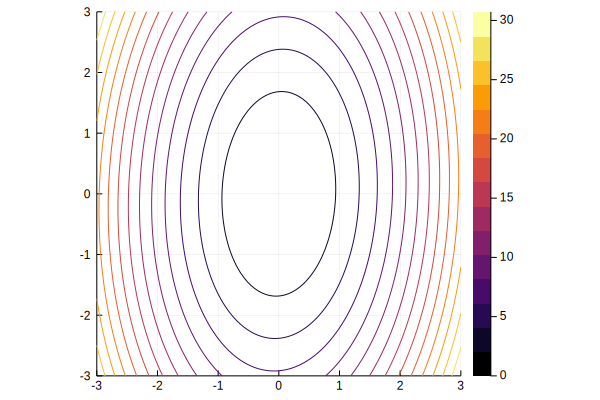

In [13]:
# Plot a 2D slice of the three-dimensional potential
plt = NormalSoS.plotlandscape(f4,U4,x,([-3 3],[-3 3]), false);    plot(plt)

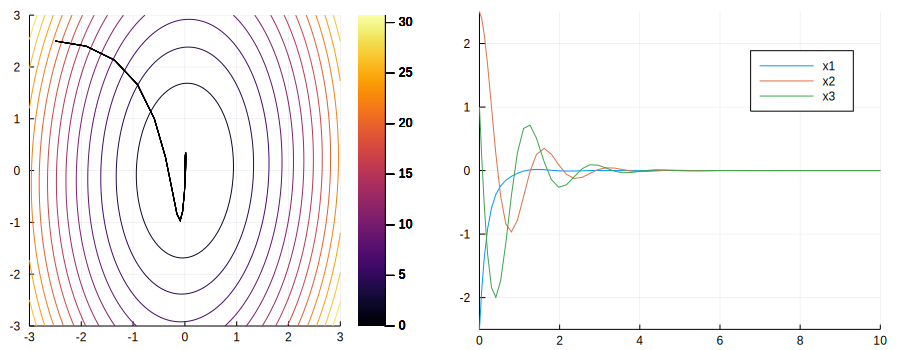

In [29]:
# Display simulations of the 3 state system with damped oscillatory dynamics
using DifferentialEquations

u0 = [-2.5;2.5;1.0];
tspan = (0.0,10.0);
f(u,p,t) = F4(u);
prob = ODEProblem(f,u0,tspan);
sol = DifferentialEquations.solve(prob);

plt2 = plot(plot(plt), plot(sol.t,sol[1,:], label="x1"), layout=@layout([a b]),size=[900,350])
plot!(plt2[1], sol[1,:],sol[2,:], color=:black, legend=false)
plot!(plt2[2], sol.t,sol[2,:], label="x2")
plot!(plt2[2], sol.t,sol[3,:], label="x3")

## Scaling

We can reun the optimization procedure many times for randomly generated systems of varying size $n$. This allows us to see how the speed of the algorithm varies with time.

In [32]:
# Perform many optimisations in a loop to test timing and accuracy
Nvec = [2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7 8 8 8 8 8 9 9 9 9 9 10 10 10 10 10];
Tvec = zeros(Float64.(Nvec));
Evec = zeros(Tvec);

for ii=1:length(Nvec)
    n = Nvec[ii];
    @polyvar x[1:n]
    A = randsys(n)
    F(X::Vector) = A*X;
    f = F(x);
    Tvec[ii] = @elapsed U = NormalSoS.normdecomp(f,x, MosekSolver(),5);
    Evec[ii] = NormalSoS.checknorm(f,U,x);
    if isnan(Evec[ii]);    Tvec[ii] = NaN;    end;
end

Computed matrix A
Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 98              
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CON

Computed matrix A
Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 98              
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CON

MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(101) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(102) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(103) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 104             
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number        

Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 104             
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 102
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 9                 conic                  : 7               
Optimizer  - Semi-definite variables: 3                 scalarized             : 132             
Factor     - setup time             : 0.00  

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 98              
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 98              
  Cones                  : 0  

  Dual.    obj: -9.2253018741e+03   nrm: 2e+06    Viol.  con: 0e+00    var: 2e-04    barvar: 2e-03  
Computed matrix A


Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^2, x1x2, x2^2, x1, x2, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 98              
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimiza

MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(101) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(102) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(103) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 104             
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number        


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 4.8003527721e-06    nrm: 8e+02    Viol.  con: 1e-06    var: 0e+00    barvar: 0e+00  
  Dual.    obj: 8.0519533014e-06    nrm: 1e+03    Viol.  con: 0e+00    var: 6e-10    barvar: 1e-09  


MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(101) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(102) of matrix 'A'.
MOSEK warning 705: #3 (nearly) zero elements are specified in sparse row ''(103) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 104             
  Cones                  : 0               
  Scalar variables       : 8               
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number        

6   1.4e-05  1.4e-05  5.7e-04  2.75e-01   -8.320293658e-02  -8.271541073e-02  1.4e-05  0.03  
7   2.1e-06  2.1e-06  1.5e-04  2.96e-01   -7.497917426e-02  -7.479410009e-02  2.1e-06  0.04  
8   3.8e-07  3.8e-07  7.4e-05  6.50e-01   -7.305840263e-02  -7.303594784e-02  3.8e-07  0.04  
9   4.1e-08  4.1e-08  2.4e-05  9.40e-01   -7.273336758e-02  -7.273090630e-02  4.1e-08  0.05  
10  1.4e-09  1.3e-09  4.5e-06  9.84e-01   -7.267639781e-02  -7.267633826e-02  1.3e-09  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: -7.2676397807e-02   nrm: 7e+00    Viol.  con: 2e-08    var: 0e+00    barvar: 0e+00  
  Dual.    obj: -7.2676338258e-02   nrm: 8e+01    Viol.  con: 0e+00    var: 1e-08    barvar: 2e-08  
status = :Optimal
bnd = x1^2 + x2^2 + x3^2
getvalue(ϵ) = [1.66487e-8, 4.77461e-9, 0.0726764]
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(284) of matrix 

3   4.9e-05  1.0e-01  2.6e-05  2.48e-01   -7.854815132e+04  -7.489201380e+04  4.9e-05  0.02  
4   1.0e-05  2.1e-02  8.4e-06  3.17e+00   -3.652545575e+03  -2.115373215e+03  1.0e-05  0.02  
5   4.7e-07  9.6e-04  2.3e-06  1.24e+00   -1.600088587e+02  -1.178582608e+02  4.7e-07  0.02  
6   6.2e-08  1.3e-04  1.0e-06  1.17e+00   -2.042768719e+01  -1.670858138e+01  6.2e-08  0.03  
7   6.1e-09  1.0e-05  5.1e-07  1.13e+00   -1.856864761e+00  -1.760222968e+00  5.0e-09  0.04  
8   1.6e-09  1.1e-06  1.2e-07  1.07e+00   -1.811929324e-01  -1.615189056e-01  5.4e-10  0.05  
9   1.6e-09  1.1e-06  1.2e-07  1.10e+00   -1.811929324e-01  -1.615189056e-01  5.4e-10  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: -1.8119293243e-01   nrm: 4e+03    Viol.  con: 2e-01    var: 0e+00    barvar: 0e+00  
  Dual.    obj: -1.6151890559e-01   nrm: 6e+03    Viol.  con: 0e+00    var: 2e-06    barvar: 3e-0

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 288             
  Cones                  : 0               
  Scalar variables       : 12              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 286
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 13                conic                  : 11              
Optimizer  - Semi-definite variables: 3                 scalarized             : 426             
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor :

1   1.2e-01  2.5e+02  4.3e-02  -9.98e-01  -2.142147126e+03  -3.519102187e+02  1.2e-01  0.01  
2   9.3e-04  1.9e+00  3.9e-05  -9.87e-01  -1.729000502e+05  -2.967098486e+04  9.3e-04  0.01  
3   1.1e-04  2.3e-01  2.5e-05  4.23e-01   -3.147575863e+04  -2.602185878e+04  1.1e-04  0.02  
4   1.2e-05  2.4e-02  1.5e-05  2.06e+00   -9.118781442e+02  -7.657809667e+02  1.2e-05  0.02  
5   1.3e-06  2.6e-03  7.9e-06  1.34e+00   -1.188234503e+02  -1.123849642e+02  1.3e-06  0.03  
6   1.8e-07  3.7e-04  3.8e-06  1.24e+00   -1.594947397e+01  -1.537731366e+01  1.8e-07  0.03  
7   1.6e-08  3.2e-05  7.3e-07  1.12e+00   -1.554639461e+00  -1.441556450e+00  1.5e-08  0.04  
8   9.4e-09  4.8e-06  2.4e-07  1.16e+00   -2.052288794e-01  -1.799783161e-01  2.4e-09  0.04  
9   6.0e-09  2.1e-08  5.0e-09  9.35e-01   7.692554086e-05   1.168088842e-03   3.4e-11  0.05  
10  1.4e-09  2.5e-09  2.4e-10  -7.63e-01  7.900044035e-03   1.480225328e-02   4.0e-12  0.05  
11  7.2e-10  1.2e-09  1.2e-10  -5.40e-01  4.296369060e-02   

MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(284) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(285) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(286) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(287) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 288             
  Cones                  : 0               
  Scalar variables       : 12              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries           

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 279             
  Cones                  : 0               
  Scalar variables       : 13              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 279             
  Cones                  : 0  

Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : UNKNOWN
  Solution status : UNKNOWN
  Primal.  obj: -7.2300882946e+04   nrm: 1e+06    Viol.  con: 7e+04    var: 0e+00    barvar: 0e+00  
  Dual.    obj: -6.4827283123e+04   nrm: 3e+06    Viol.  con: 0e+00    var: 2e-03    barvar: 5e-03  
Computed matrix A
Chosen basis as:
DynamicPolynomials.Monomial{true}[x1^2, x1x2, x1x3, x2^2, x2x3, x3^2, x1, x2, x3, 1]
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 279             
  Cones                  : 0               
  Scalar variables       : 13              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time  

MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(284) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(285) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(286) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(287) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 288             
  Cones                  : 0               
  Scalar variables       : 12              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries           

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 288             
  Cones                  : 0               
  Scalar variables       : 12              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 286
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 13                conic                  : 11              
Optimizer  - Semi-definite variables: 3                 scalarized             : 426             
Factor     - setup time             : 0.00              dense det. time        : 0.00            
Factor     - ML order time          : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor :

8   4.7e-07  4.7e-07  6.3e-05  7.35e-01   -1.444595371e-01  -1.444084819e-01  4.7e-07  0.04  
9   8.0e-08  8.0e-08  5.1e-05  9.03e-01   -1.441797091e-01  -1.441780537e-01  7.9e-08  0.04  
10  8.4e-10  7.8e-10  7.8e-10  9.87e-01   -1.441175266e-01  -1.441174848e-01  8.5e-10  0.05  
Optimizer terminated. Time: 0.05    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: -1.4411752663e-01   nrm: 6e+00    Viol.  con: 2e-08    var: 0e+00    barvar: 0e+00  
  Dual.    obj: -1.4411748484e-01   nrm: 8e+01    Viol.  con: 0e+00    var: 8e-09    barvar: 8e-09  
status = :Optimal
bnd = x1^2 + x2^2 + x3^2
getvalue(ϵ) = [0.144117, 6.12269e-8, 1.76375e-8]
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(284) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(285) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(286) of matr

MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(285) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(286) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(287) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 288             
  Cones                  : 0               
  Scalar variables       : 12              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number        

MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(284) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(285) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(286) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(287) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 288             
  Cones                  : 0               
  Scalar variables       : 12              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries           

1   1.4e-01  4.7e+03  5.4e-02  -1.00e+00  -2.524649567e+04  -1.143987175e+03  1.4e-01  0.01  
2   3.4e-03  1.1e+02  2.0e-04  -9.99e-01  -1.239437346e+06  -6.326056454e+04  3.3e-03  0.01  
3   6.2e-05  2.0e+00  7.0e-07  -9.70e-01  -3.388040737e+07  -1.856637308e+06  6.2e-05  0.02  
4   2.8e-06  9.2e-02  1.7e-07  2.98e-01   -3.420836061e+06  -2.254808448e+06  2.8e-06  0.02  
5   2.5e-07  8.3e-03  2.4e-07  2.02e+00   -1.562192542e+05  -1.517605823e+05  2.5e-07  0.03  
6   6.6e-08  2.2e-03  1.0e-07  1.32e+00   -3.287966443e+04  -3.115866839e+04  6.6e-08  0.03  
7   2.7e-09  6.5e-05  2.0e-08  1.24e+00   -8.817719664e+02  -8.428904590e+02  2.0e-09  0.04  
8   7.3e-10  3.2e-07  1.6e-09  1.01e+00   -4.285074758e+00  -4.139127784e+00  9.3e-12  0.05  
9   7.3e-10  3.2e-07  1.6e-09  1.25e+00   -4.285074758e+00  -4.139127784e+00  9.3e-12  0.06  
Optimizer terminated. Time: 0.07    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

3   8.9e-04  2.2e-01  5.3e-04  4.85e-01   -4.319686285e+03  -3.648048891e+03  8.7e-04  0.02  
4   1.2e-04  3.1e-02  2.8e-04  2.54e+00   -1.879982043e+02  -1.416421057e+02  1.2e-04  0.02  
5   8.7e-06  2.2e-03  1.1e-04  1.47e+00   -1.121509389e+01  -9.695581865e+00  8.6e-06  0.03  
6   1.6e-08  3.9e-06  6.5e-06  1.06e+00   -2.198927831e-02  -2.068685305e-02  1.5e-08  0.03  
7   6.6e-10  5.5e-09  1.2e-07  1.01e+00   -2.308935050e-05  -1.517216449e-05  3.8e-11  0.04  
Optimizer terminated. Time: 0.04    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: -2.3089350500e-05   nrm: 3e+02    Viol.  con: 2e-05    var: 0e+00    barvar: 0e+00  
  Dual.    obj: -1.5172164581e-05   nrm: 5e+02    Viol.  con: 0e+00    var: 4e-09    barvar: 9e-09  
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(284) of matrix 'A'.
MOSEK warning 705: #4 (nearly) zero elements are specified in sparse row ''(285) of matr

2   3.0e-02  3.0e-02  2.1e-01  1.15e+00   -1.634775300e-01  -1.778952616e-01  3.0e-02  0.06  
3   3.9e-03  3.9e-03  5.4e-02  1.02e+00   -5.329221269e-02  -5.269984058e-02  3.9e-03  0.08  
4   8.4e-04  8.4e-04  2.5e-02  6.34e-01   -2.035154997e-02  -2.038256895e-02  8.4e-04  0.11  
5   1.5e-04  1.5e-04  8.0e-03  7.62e-01   -7.984753866e-03  -7.881253008e-03  1.5e-04  0.13  
6   3.1e-05  3.1e-05  2.7e-03  6.62e-01   -3.810277687e-03  -3.742916403e-03  3.1e-05  0.15  
7   5.7e-06  5.7e-06  7.8e-04  5.62e-01   -2.118644114e-03  -2.082997577e-03  5.7e-06  0.17  
8   1.2e-06  1.2e-06  2.6e-04  5.95e-01   -1.483335420e-03  -1.466418405e-03  1.2e-06  0.19  
9   2.1e-07  2.0e-07  7.8e-05  4.80e-01   -1.182405444e-03  -1.176657741e-03  2.0e-07  0.21  
10  3.2e-08  2.7e-08  2.6e-05  8.25e-01   -1.098460443e-03  -1.097498614e-03  2.8e-08  0.23  
11  4.3e-09  1.4e-09  5.5e-10  9.01e-01   -1.082426024e-03  -1.082399856e-03  6.5e-10  0.25  
Optimizer terminated. Time: 0.25    


Interior-point soluti

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 647             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 645
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 18                conic                  : 16              
Optimizer  - Semi-definite variables: 3                 scalarized             : 1065            
Factor     - setup time             : 0.02              dense det. time        : 0.00            
Factor     - ML order time          : 0.01              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.91e+0

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 634             
  Cones                  : 0               
  Scalar variables       : 19              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 634             
  Cones                  : 0  

MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(642) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(643) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(644) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(645) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(646) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 647             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries             

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 647             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 647             
  Cones                  : 0  

MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(642) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(643) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(644) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(645) of matrix 'A'.
MOSEK warning 705: #5 (nearly) zero elements are specified in sparse row ''(646) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 647             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries             

2   4.6e-03  9.4e+00  3.0e-04  -1.01e+00  -2.711071493e+05  -3.284076498e+04  4.6e-03  0.07  
3   6.1e-04  1.2e+00  4.2e-05  -6.93e-01  -2.779952788e+05  -6.122089472e+04  6.1e-04  0.09  
4   8.7e-05  1.8e-01  3.3e-05  1.16e+00   -3.719399081e+04  -3.015020709e+04  8.7e-05  0.12  
5   9.1e-06  1.8e-02  1.2e-05  1.91e+00   -2.929699371e+03  -2.392850914e+03  9.0e-06  0.15  
6   6.5e-07  1.3e-03  6.0e-06  1.14e+00   -2.065472637e+02  -1.949565963e+02  6.5e-07  0.18  
7   6.8e-08  1.4e-04  1.8e-06  1.03e+00   -1.759784213e+01  -1.620420379e+01  6.6e-08  0.21  
8   1.6e-08  1.8e-05  6.6e-07  1.14e+00   -2.354629896e+00  -2.167718957e+00  8.7e-09  0.23  
9   1.2e-08  1.0e-05  5.1e-07  1.09e+00   -1.320481093e+00  -1.219650868e+00  5.0e-09  0.26  
10  1.2e-08  1.0e-05  5.1e-07  1.15e+00   -1.320481093e+00  -1.219650868e+00  5.0e-09  0.30  
Optimizer terminated. Time: 0.31    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

2   2.2e-02  2.2e-02  1.2e-01  1.25e+00   -9.497995918e-01  -9.427298864e-01  2.2e-02  0.06  
3   4.5e-03  4.5e-03  5.1e-02  1.03e+00   -8.143988539e-01  -8.124197489e-01  4.5e-03  0.09  
4   5.9e-04  5.9e-04  1.5e-02  7.93e-01   -7.704976925e-01  -7.697497705e-01  5.9e-04  0.10  
5   4.4e-05  4.4e-05  3.6e-03  8.80e-01   -7.633157245e-01  -7.632330607e-01  4.4e-05  0.12  
6   5.9e-07  5.9e-07  7.1e-04  9.52e-01   -7.625756429e-01  -7.625759262e-01  5.9e-07  0.14  
7   3.8e-09  3.8e-09  5.8e-05  9.97e-01   -7.625661280e-01  -7.625661300e-01  3.8e-09  0.17  
Optimizer terminated. Time: 0.17    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: -7.6256612801e-01   nrm: 1e+00    Viol.  con: 6e-09    var: 0e+00    barvar: 0e+00  
  Dual.    obj: -7.6256613004e-01   nrm: 8e+00    Viol.  con: 0e+00    var: 6e-09    barvar: 6e-09  
status = :Optimal
bnd = x1^2 + x2^2 + x3^2 + x4^2
getvalue(ϵ) = [-2.54667e-9, 0.0900578, 0

2   5.9e-03  1.5e+00  6.0e-04  -9.48e-01  -3.098512081e+04  -7.139806057e+03  5.8e-03  0.07  
3   1.0e-03  2.5e-01  7.5e-04  9.32e-01   -3.672831799e+03  -3.243111187e+03  9.9e-04  0.09  
4   1.5e-04  3.7e-02  3.2e-04  2.49e+00   -1.788971138e+02  -1.276635982e+02  1.5e-04  0.12  
5   1.8e-05  4.6e-03  1.4e-04  1.37e+00   -1.843653260e+01  -1.421175619e+01  1.8e-05  0.14  
6   9.3e-07  2.4e-04  4.1e-05  1.13e+00   -9.900135227e-01  -8.682659261e-01  9.2e-07  0.16  
7   8.6e-09  2.2e-06  4.0e-06  1.02e+00   -8.924197302e-03  -7.781081757e-03  8.5e-09  0.19  
8   4.5e-09  2.0e-08  1.3e-07  8.72e-01   5.158870316e-05   1.501585385e-04   1.9e-10  0.20  
9   8.3e-10  4.5e-11  3.8e-11  -7.63e-01  9.052830432e-03   1.438481431e-02   2.0e-12  0.23  
10  1.1e-10  7.0e-12  8.2e-13  -9.84e-01  1.194065296e-01   1.838905874e-01   1.5e-13  0.25  
11  1.1e-10  7.0e-12  8.2e-13  -4.70e-01  1.194065296e-01   1.838905874e-01   1.5e-13  0.29  
Optimizer terminated. Time: 0.31    


Interior-point soluti

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 634             
  Cones                  : 0               
  Scalar variables       : 19              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 630
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 20                conic                  : 16              
Optimizer  - Semi-definite variables: 2                 scalarized             : 1050            
Factor     - setup time             : 0.03              dense det. time        : 0.00            
Factor     - ML order time          : 0.01              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.90e+0

2   1.8e-02  1.8e-02  1.0e-01  1.49e+00   -1.365691951e+00  -1.355862456e+00  1.8e-02  0.06  
3   1.8e-03  1.8e-03  3.4e-02  9.90e-01   -1.214792954e+00  -1.214254845e+00  1.8e-03  0.08  
4   5.5e-04  5.5e-04  1.8e-02  8.94e-01   -1.199370675e+00  -1.199181478e+00  5.5e-04  0.10  
5   1.7e-05  1.7e-05  3.3e-03  9.70e-01   -1.191494362e+00  -1.191489229e+00  1.7e-05  0.12  
6   1.2e-06  1.2e-06  8.7e-04  9.98e-01   -1.191304225e+00  -1.191303940e+00  1.2e-06  0.15  
7   7.5e-09  7.5e-09  1.0e-04  9.98e-01   -1.191292589e+00  -1.191292594e+00  7.5e-09  0.17  
Optimizer terminated. Time: 0.17    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: -1.1912925893e+00   nrm: 1e+00    Viol.  con: 1e-08    var: 0e+00    barvar: 0e+00  
  Dual.    obj: -1.1912925935e+00   nrm: 3e+00    Viol.  con: 0e+00    var: 1e-08    barvar: 1e-08  
status = :Optimal
bnd = x1^2 + x2^2 + x3^2 + x4^2
getvalue(ϵ) = [0.257457, 0.307313, 0.289

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 647             
  Cones                  : 0               
  Scalar variables       : 17              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 647             
  Cones                  : 0  

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0               
  Scalar variables       : 26              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1242
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 27                conic                  : 22              
Optimizer  - Semi-definite variables: 2                 scalarized             : 2232            
Factor     - setup time             : 0.11              dense det. time        : 0.00            
Factor     - ML order time          : 0.05              GP order time          : 0.00            
Factor     - nonzeros before factor : 7.47e+

MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1259) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1260) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1261) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1262) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1263) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1264) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Li

MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1259) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1260) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1261) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1262) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1263) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1264) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Li

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1263
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 24                conic                  : 22              
Optimizer  - Semi-definite variables: 3                 scalarized             : 2253            
Factor     - setup time             : 0.11              dense det. time        : 0.00            
Factor     - ML order time          : 0.05              GP order time          : 0.00            
Factor     - nonzeros before factor 

MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1259) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1260) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1261) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1262) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1263) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1264) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Li

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0               
  Scalar variables       : 26              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0  

MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1259) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1260) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1261) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1262) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1263) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1264) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Li

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones               

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1263
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 24                conic                  : 22              
Optimizer  - Semi-definite variables: 3                 scalarized             : 2253            
Factor     - setup time             : 0.11              dense det. time        : 0.00            
Factor     - ML order time          : 0.05              GP order time          : 0.00            
Factor     - nonzeros before factor 

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1263
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 24                conic                  : 22              
Optimizer  - Semi-definite variables: 3                 scalarized             : 2253            
Factor     - setup time             : 0.11              dense det. time        : 0.00            
Factor     - ML order time          : 0.05              GP order time          : 0.00            
Factor     - nonzeros before factor 

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0               
  Scalar variables       : 26              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0  

MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1259) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1260) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1261) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1262) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1263) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1264) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Li

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1263
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 24                conic                  : 22              
Optimizer  - Semi-definite variables: 3                 scalarized             : 2253            
Factor     - setup time             : 0.11              dense det. time        : 0.00            
Factor     - ML order time          : 0.05              GP order time          : 0.00            
Factor     - nonzeros before factor 

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1263
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 24                conic                  : 22              
Optimizer  - Semi-definite variables: 3                 scalarized             : 2253            
Factor     - setup time             : 0.11              dense det. time        : 0.00            
Factor     - ML order time          : 0.05              GP order time          : 0.00            
Factor     - nonzeros before factor 

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0               
  Scalar variables       : 26              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0  

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1263
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 24                conic                  : 22              
Optimizer  - Semi-definite variables: 3                 scalarized             : 2253            
Factor     - setup time             : 0.11              dense det. time        : 0.00            
Factor     - ML order time          : 0.05              GP order time          : 0.00            
Factor     - nonzeros before factor 

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0               
  Scalar variables       : 26              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1247            
  Cones                  : 0  

MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1259) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1260) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1261) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1262) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1263) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1264) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Li

MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1259) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1260) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1261) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1262) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1263) of matrix 'A'.
MOSEK warning 705: #6 (nearly) zero elements are specified in sparse row ''(1264) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Li

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1265            
  Cones                  : 0               
  Scalar variables       : 23              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 1263
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 24                conic                  : 22              
Optimizer  - Semi-definite variables: 3                 scalarized             : 2253            
Factor     - setup time             : 0.13              dense det. time        : 0.00            
Factor     - ML order time          : 0.06              GP order time          : 0.00            
Factor     - nonzeros before factor 

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0               
  Scalar variables       : 34              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0  

MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2235) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2236) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2237) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2238) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2239) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2240) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2241) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0               
  Scalar variables       : 34              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0  

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0               
  Scalar variables       : 34              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0  

MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2235) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2236) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2237) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2238) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2239) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2240) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2241) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3   

MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2235) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2236) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2237) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2238) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2239) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2240) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2241) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3   

MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2235) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2236) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2237) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2238) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2239) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2240) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2241) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3   

MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2235) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2236) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2237) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2238) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2239) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2240) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2241) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 2240
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 31                conic                  : 29              
Optimizer  - Semi-definite variables: 3                 scalarized             : 4242            
Factor     - setup time             : 0.41              dense det. time        : 0.00            
Factor     - ML order time          : 0.22              GP order time          : 0.00            
Factor     - nonzeros before factor : 2.39e+

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0  

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0  

MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2235) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2236) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2237) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2238) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2239) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2240) of matrix 'A'.
MOSEK warning 705: #7 (nearly) zero elements are specified in sparse row ''(2241) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3   

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0               
  Scalar variables       : 34              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2218            
  Cones                  : 0  

Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer  - threads                : 2               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 2240
Optimizer  - Cones                  : 1
Optimizer  - Scalar variables       : 31                conic                  : 29              
Optim

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0               
  Scalar variables       : 30              
  Matrix variables       : 3               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2242            
  Cones                  : 0  

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0               
  Scalar variables       : 43              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0  

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0               
  Scalar variables       : 43              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0  

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones                  : 0               
  Scalar variables       : 38              
  Matrix variables       : 3   

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0               
  Scalar variables       : 43              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0  

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0               
  Scalar variables       : 43              
  Matrix variables       : 2               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0  

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3686) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3687) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3688) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3689) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3690) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3691) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3692) of matrix 'A'.
MOSEK warning 705: #8 (nearly) zero elements are specified in sparse row ''(3693) of matrix 'A'.
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3694            
  Cones               

Excessive output truncated after 524348 bytes.

  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3663            
  Cones                  : 0               
  Scalar variables       : 43              


In [38]:
# Plot the computation time and accuracy against system size.
plot(scatter(Nvec',log.(Tvec'),legend=false, xlabel="System size, n",ylabel="log(Computation time)"),
     scatter(Nvec',log.(Evec'),legend=false, xlabel="System size, n",ylabel="log(Acccuracy)"),
     layout=@layout([a b]), size=[1000,400])